# Monte Carlo Simulation for the estimation of $\pi$

<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: {
    equationNumbers: { autoNumber: "AMS" }
  }
});
</script>

This notebook is all about the how monte carlo simmulation can be used to estimate the value of $\pi$.

### Approach

Consider a Square of side $l$ and a circle inside it whose radius would be $r = l/2$. Now if you pick random points from the area of the square and count two things:

1. Number of points picked denote it with $N$
2. Number of points inside Circle, denoted with $N_c$ 

Now if you have taken a class in probability, even if not still just by intuition, we can say that **the number of points picked from a given area(in our case it is square/circle) would just be proportional to the Area of that region/surface.** 

Let me denote the probability of the point $q_i = \{x,y\, |\, x,y \in [-r, r]\}\, \, \forall \ i = 1, 2, \ldots, N$ with $P(q_i)$. Those who are familiar with this notation can skip this paragraph but for others let me explain the all this mathematical jargon. The point $q_i$ is the $i^{th}$ point from all the $N$ points picked. This point $q_i$ has coordinates $(x, y)$ where $x$ and $y$ can be in the range $[-r, r]$ which is the radius of the circle. Do not get confused by the fact that the $(x, y)$ are in range from the circle's radius. This range makes a square of side length $l (=2r)$  


Now the probability of the point $P(q_i)$ is 
<div align=center>

$P(q_i\ inside\ the\ circle) \propto Area\ of\ Circle$
</div>

What is the probability of points $q_i$ inside the square? The answer is just 1 as we always choose the points inside the square only. But one could also think of it as 

<div align=center>

$P(q_i\ inside\ the\ square) \propto Area\ of\ square$
</div>

Since we know the relationship between the area of circle and the area of square, we can write the following equation.

$$
\begin{align*}
A_{square} &= l^2\\
A_{circle} &= \pi r^2\\
\end{align*}
$$

where $A_{square}$ and $A_{circle}$ are the area of square and circle respectively.

Now if we try to compute the ratio of the two areas, we get,

$$
\begin{align*}
\frac{A_{circle}}{A_{square}} &= \frac{\pi r^2}{l^2} \\
                              &= \frac{\pi r^2}{(2r)^2} \\
                              &= \frac{\pi}{4}
                              
  
\end{align*}
$$

We also know that the area is proportional to the probability of that point in that area, so we say,



$$
\begin{align*}
\frac{A_{circle}}{A_{square}} &= \frac{P(q_i\ inside\ the\ circle)}{P(q_i\ inside\ the\ square)} \\
                              &= \frac{P(q_i\ inside\ the\ circle)}{1} \tag*{[$\because P(q_i\ \text{inside the square}) = 1]\quad$}  \\
                              &= P(q_i\ inside\ the\ circle)
\end{align*}
$$

With this, we can compute $\pi$ with the following equation:
$$
\begin{align*}
\boxed{\pi= 4 \cdot P(q_i\ inside\ the\ circle)}                
\end{align*}
$$

### But what is $P(q_i\ inside\ the\ circle)?$

One would say, well I will randomly pick points from the square and compute the probability as follows: 

$$
\begin{align*}
P(q_i\ inside\ the\ circle) = \lim_{N \to \infty} \frac{number\ of\ points\ (q_i)\ inside\ the\ circle}{N}
\end{align*}
$$

But in practice, How would you estimate/evaluate this limit? The answer to this questino is pretty straight forward, just start the experiment and do the experiment till the probability becomes constant/fixed. Once you have reached to that stage, you can stop the experiment and that is you final probability!

So my probability becomes,

$$
\begin{align*}
P(q_i\ inside\ the\ circle) = \lim_{N \to \mathcal{N} } \frac{number\ of\ points\ (q_i)\ inside\ the\ circle}{N} \approx fixed\ value \tag{$where,\ \mathcal{N}\ is\ large\ enough$}
\end{align*}
$$


### Why is it called Monte Carlo?

This process of selecting the points randomly or picking/sampling data randomly and then computing the desired result from it using the **Law of Large Numbers** is the so-called ***Monte Carlo Method***.The name comes from the Monte Carlo Casino in Monaco, where the primary developer of the method, mathematician Stanisław Ulam, was inspired by his uncle's gambling habits. Monte Carlo methods are widely used in various fields of science, engineering, and mathematics, such as physics, chemistry, biology, statistics, artificial intelligence, finance, and cryptography([Wiki](https://en.wikipedia.org/wiki/Monte_Carlo_method)).

Below is the code example to do the above process in python, the code is self explanatory if you have basic knowledge of python.

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# ----------
# Parameters
# ----------
R = 1 # Radius of the circle
L = 2 * R # Side of the Square
N = 10000 # Total Number of Points(>1000)

np.random.seed(1)
nCircle = np.zeros(N)
pi = np.zeros(N)
for n in range(1, N+1):
    x = np.random.uniform(-R, R, size= n)
    y = np.random.uniform(-R, R, size= n)
    r = x**2 + y**2
    
    # Number of Points that come in circle
    nCircle[n-1] = np.sum(r <= R**2)

    pi[n-1] = 4 * nCircle[n-1] / n

print("Estimated Value of Pi is ", np.mean(pi[(N - 1000):]))

Estimated Value of Pi is  3.1412628698356113


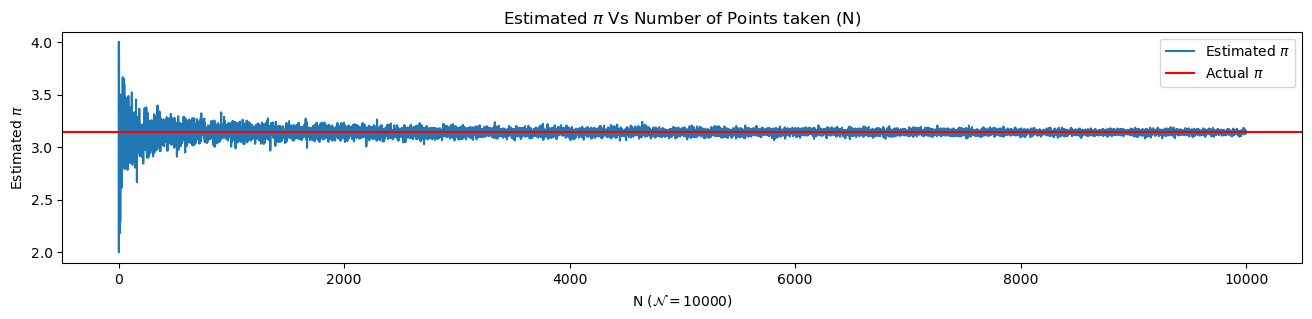

In [59]:
# Plotting
plt.figure(figsize=(16,3))
plt.plot(pi, label=r"Estimated $\pi$")
plt.axhline(y=np.pi, color="red", label= r"Actual $\pi$")
plt.ylabel(r"Estimated $\pi$")
plt.xlabel("N ("+r"$\mathcal{N}=$"+f"{N})")
plt.legend()
plt.title(r"Estimated $\pi$ Vs Number of Points taken (N)")
plt.show()

Peak Value of Pi Distribution:  3.14


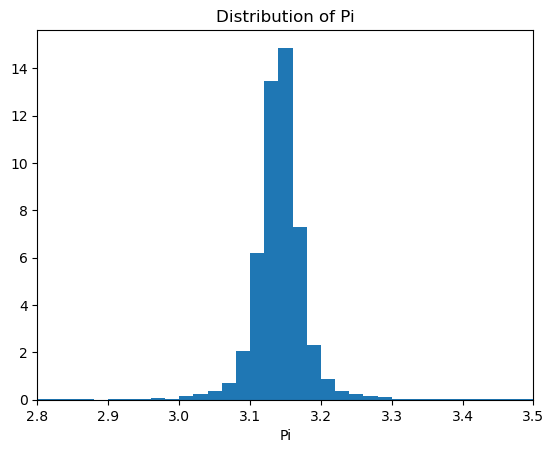

In [60]:
height, bin, _ = plt.hist(pi, density = True, bins=100)
plt.xlabel("Pi")
plt.title("Distribution of Pi")
plt.xlim(2.8,3.5)

index = np.argmax(height)
print("Peak Value of Pi Distribution: ",pi_estimated)
pi_estimated = bin[index]

plt.show()